In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your stock price data
# For this example, let's assume you have a CSV file with columns 'Date' and 'Close'
data = pd.read_csv('NFLX.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [ ]:
# Extract the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)
prices

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [ ]:
# Normalize the data to values between 0 and 1
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)
prices_scaled


array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
# Prepare the data for training
sequence_length = 10  # adjust as needed
X, y = [], []
for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length, 0])
    y.append(prices_scaled[i+sequence_length, 0])
X, y = np.array(X), np.array(y)
X,y

(array([[0.04451626, 0.06954849, 0.06701469, ..., 0.0701601 , 0.10133021,
         0.09750767],
        [0.06954849, 0.06701469, 0.03542955, ..., 0.10133021, 0.09750767,
         0.09757319],
        [0.06701469, 0.03542955, 0.03405342, ..., 0.09750767, 0.09757319,
         0.10301218],
        ...,
        [0.61593233, 0.59930975, 0.35739716, ..., 0.32869527, 0.42214021,
         0.48764772],
        [0.59930975, 0.35739716, 0.33478952, ..., 0.42214021, 0.48764772,
         0.4272515 ],
        [0.35739716, 0.33478952, 0.28950877, ..., 0.48764772, 0.4272515 ,
         0.37509011]]),
 array([0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
        0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
        0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
        0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
        0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
        0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
 

In [ ]:
# Reshape input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X

array([[[0.04451626],
        [0.06954849],
        [0.06701469],
        ...,
        [0.0701601 ],
        [0.10133021],
        [0.09750767]],

       [[0.06954849],
        [0.06701469],
        [0.03542955],
        ...,
        [0.10133021],
        [0.09750767],
        [0.09757319]],

       [[0.06701469],
        [0.03542955],
        [0.03405342],
        ...,
        [0.09750767],
        [0.09757319],
        [0.10301218]],

       ...,

       [[0.61593233],
        [0.59930975],
        [0.35739716],
        ...,
        [0.32869527],
        [0.42214021],
        [0.48764772]],

       [[0.59930975],
        [0.35739716],
        [0.33478952],
        ...,
        [0.42214021],
        [0.48764772],
        [0.4272515 ]],

       [[0.35739716],
        [0.33478952],
        [0.28950877],
        ...,
        [0.48764772],
        [0.4272515 ],
        [0.37509011]]])

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 4s 12ms/step - loss: 0.0421
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 0.0024
Epoch 4/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 5/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0023
Epoch 6/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 8/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0022
Epoch 9/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0022
Epoch 10/10
32/32 [==============================] - 0s 12ms/step - loss: 0.0022


In [ ]:
# Make predictions on future data (e.g., next 10 days)
future_days = 10
predictions = []
last_sequence = prices_scaled[-sequence_length:]
for i in range(future_days):
    pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predictions.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred[0, 0]

1/1 [==============================] - 0s 22ms/step


In [ ]:
# Reverse the scaling to get the actual stock prices
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predictions

array([[398.1595 ],
       [400.81805],
       [403.91873],
       [406.71692],
       [407.27655],
       [407.83997],
       [405.57114],
       [401.61902],
       [399.76767],
       [399.44125]], dtype=float32)

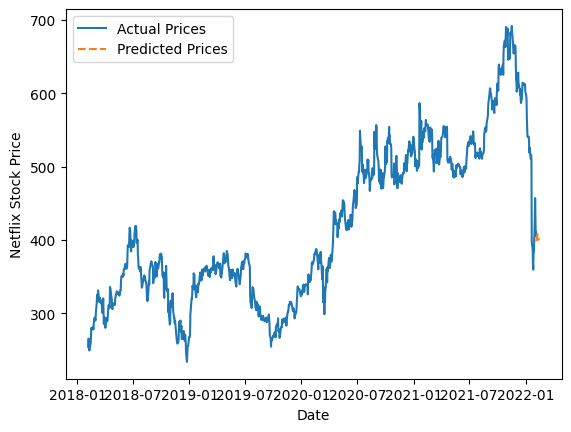

In [ ]:
# Plot the results
plt.plot(data.index, prices, label='Actual Prices')
plt.plot(pd.date_range(start=data.index[-1], periods=future_days + 1)[1:], predictions, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()
